## Kaiming weight Initialization

## Imports

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from baseSetterHelper import setAllSeeds, setDeterministic, computeAccu
from trainerHelper import modelTrainer
from plottingHelper import plotTrainingLoss, plotAccuracy, show_examples
from dataLoaderHelper import getDataLoadersMNIST

## Settings Parameter

In [21]:
RANDOM_SEED = 123
BATCH_SIZE = 256
NUM_HIDDEN_1 = 75
NUM_HIDDEN_2 = 45
NUM_EPOCHS = 50
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [22]:
setAllSeeds(RANDOM_SEED)
setDeterministic()

## Data Loader and Data Initialization

In [23]:
trainLoader, validLoader, testLoader = getDataLoadersMNIST(
    batchSize=BATCH_SIZE,
    validFraction=0.1)

# Checking the dataset
for images, labels in trainLoader:
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    print('Class labels of 10 examples:', labels[:10])
    break

Image batch dimensions: torch.Size([256, 1, 28, 28])
Image label dimensions: torch.Size([256])
Class labels of 10 examples: tensor([4, 5, 8, 9, 9, 4, 9, 9, 3, 9])


## Class

In [24]:
class MultilayerPerceptron(torch.nn.Module):

    def __init__(self, numFeatures, numClasses, dropProba, numHidden1, numHidden2):
        super().__init__()

        self.my_network = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Flatten(),
            torch.nn.Linear(numFeatures, numHidden1),
            # torch.nn.BatchNorm1d(numHidden1),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # 2nd hidden layer
            torch.nn.Linear(numHidden1, numHidden2),
            # torch.nn.BatchNorm1d(numHidden2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropProba),
            # output layer
            torch.nn.Linear(numHidden2, numClasses)
        )

        for modu in self.modules():
          if (isinstance(modu,torch.nn.Linear)):
            # modu.weight.detach().normal_(0,0.001)
            torch.nn.init.kaiming_uniform_(modu.weight, mode='fan_in', nonlinearity='relu')
            if (modu.bias is not None):
              modu.bias.detach().zero_()

    def forward(self, x):
        logits = self.my_network(x)
        return logits

## Without Dropout

In [25]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.0,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [26]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.6304
Epoch:001/050 | Batch:050/210 |  Cost:0.6442
Epoch:001/050 | Batch:100/210 |  Cost:0.3852
Epoch:001/050 | Batch:150/210 |  Cost:0.3313
Epoch:001/050 | Batch:200/210 |  Cost:0.2585
Epoch:001/050 |
Train Acc 90.8333%
Val Acc   92.5667%
Time Taken: 0.30 min
Epoch:002/050 | Batch:000/210 |  Cost:0.2815
Epoch:002/050 | Batch:050/210 |  Cost:0.3328
Epoch:002/050 | Batch:100/210 |  Cost:0.2883
Epoch:002/050 | Batch:150/210 |  Cost:0.2684
Epoch:002/050 | Batch:200/210 |  Cost:0.2473
Epoch:002/050 |
Train Acc 92.9706%
Val Acc   94.5167%
Time Taken: 0.58 min
Epoch:003/050 | Batch:000/210 |  Cost:0.2372
Epoch:003/050 | Batch:050/210 |  Cost:0.2117
Epoch:003/050 | Batch:100/210 |  Cost:0.2544
Epoch:003/050 | Batch:150/210 |  Cost:0.2412
Epoch:003/050 | Batch:200/210 |  Cost:0.2204
Epoch:003/050 |
Train Acc 93.9025%
Val Acc   94.8000%
Time Taken: 0.87 min
Epoch:004/050 | Batch:000/210 |  Cost:0.2234
Epoch:004/050 | Batch:050/210 |  Cost:0.2356
Epoch:004/

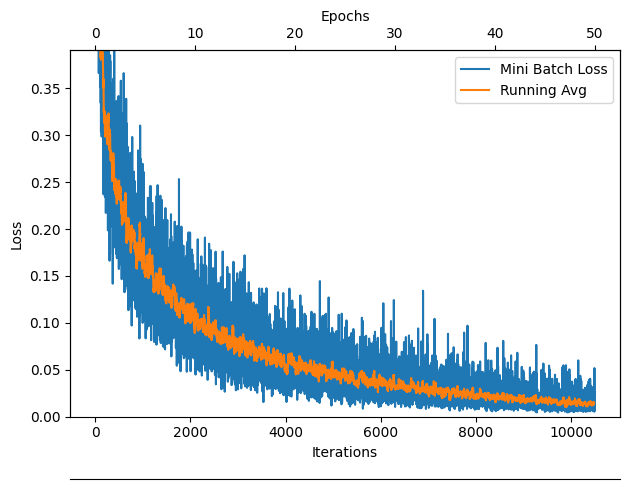

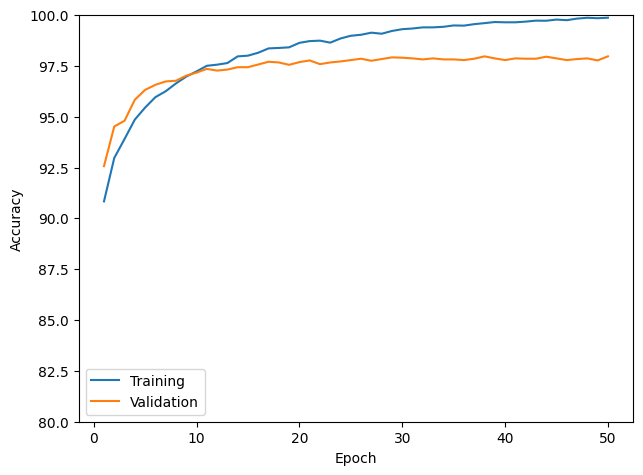

In [27]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With DropOut as 0.5

In [28]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.5,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [29]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:3.0012
Epoch:001/050 | Batch:050/210 |  Cost:1.7004
Epoch:001/050 | Batch:100/210 |  Cost:1.2332
Epoch:001/050 | Batch:150/210 |  Cost:1.0643
Epoch:001/050 | Batch:200/210 |  Cost:0.9859
Epoch:001/050 |
Train Acc 86.7987%
Val Acc   89.3833%
Time Taken: 0.30 min
Epoch:002/050 | Batch:000/210 |  Cost:0.9685
Epoch:002/050 | Batch:050/210 |  Cost:0.7554
Epoch:002/050 | Batch:100/210 |  Cost:0.8527
Epoch:002/050 | Batch:150/210 |  Cost:0.7761
Epoch:002/050 | Batch:200/210 |  Cost:0.7385
Epoch:002/050 |
Train Acc 90.0484%
Val Acc   91.8667%
Time Taken: 0.58 min
Epoch:003/050 | Batch:000/210 |  Cost:0.7030
Epoch:003/050 | Batch:050/210 |  Cost:0.7111
Epoch:003/050 | Batch:100/210 |  Cost:0.6206
Epoch:003/050 | Batch:150/210 |  Cost:0.5978
Epoch:003/050 | Batch:200/210 |  Cost:0.6307
Epoch:003/050 |
Train Acc 91.2612%
Val Acc   93.0667%
Time Taken: 0.86 min
Epoch:004/050 | Batch:000/210 |  Cost:0.5927
Epoch:004/050 | Batch:050/210 |  Cost:0.5757
Epoch:004/

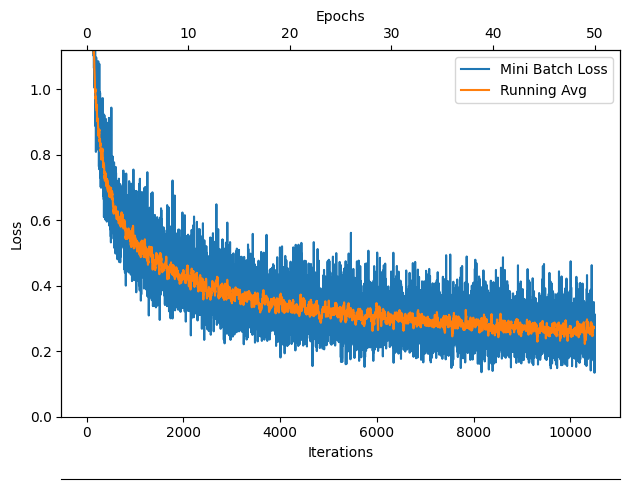

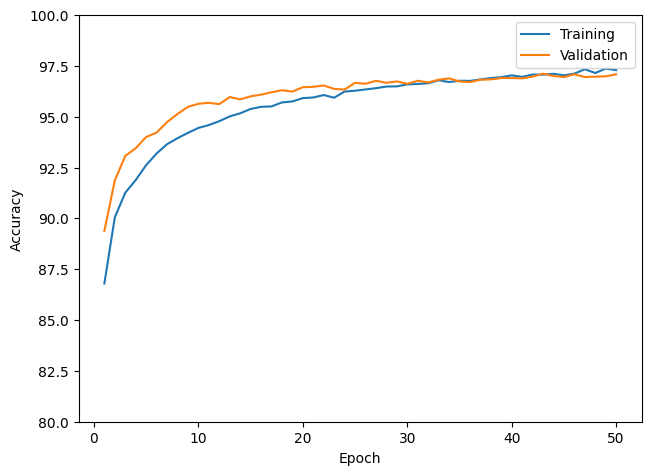

In [30]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With DropOut as 0.1

In [31]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [32]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/050 | Batch:000/210 |  Cost:2.6802
Epoch:001/050 | Batch:050/210 |  Cost:0.8386
Epoch:001/050 | Batch:100/210 |  Cost:0.5673
Epoch:001/050 | Batch:150/210 |  Cost:0.4909
Epoch:001/050 | Batch:200/210 |  Cost:0.3713
Epoch:001/050 |
Train Acc 90.4204%
Val Acc   92.3000%
Time Taken: 0.28 min
Epoch:002/050 | Batch:000/210 |  Cost:0.4288
Epoch:002/050 | Batch:050/210 |  Cost:0.3275
Epoch:002/050 | Batch:100/210 |  Cost:0.3694
Epoch:002/050 | Batch:150/210 |  Cost:0.3399
Epoch:002/050 | Batch:200/210 |  Cost:0.3209
Epoch:002/050 |
Train Acc 92.7158%
Val Acc   94.3833%
Time Taken: 0.57 min
Epoch:003/050 | Batch:000/210 |  Cost:0.3148
Epoch:003/050 | Batch:050/210 |  Cost:0.2898
Epoch:003/050 | Batch:100/210 |  Cost:0.3096
Epoch:003/050 | Batch:150/210 |  Cost:0.2475
Epoch:003/050 | Batch:200/210 |  Cost:0.2831
Epoch:003/050 |
Train Acc 93.8895%
Val Acc   95.3167%
Time Taken: 0.85 min
Epoch:004/050 | Batch:000/210 |  Cost:0.2419
Epoch:004/050 | Batch:050/210 |  Cost:0.2278
Epoch:004/

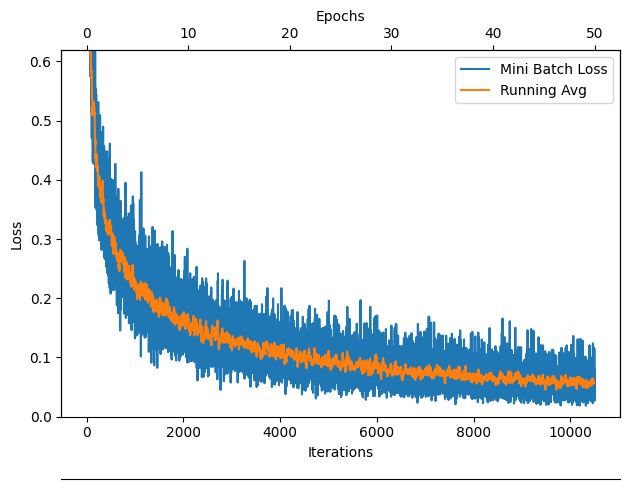

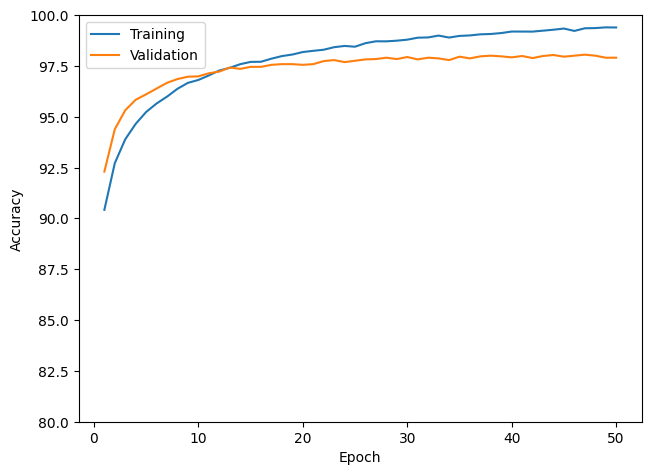

In [33]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()

## With dropOut as 0.1 and 100 iterations

In [37]:
torch.manual_seed(RANDOM_SEED)
model = MultilayerPerceptron(numFeatures=28*28,
                             numHidden1=NUM_HIDDEN_1,
                             numHidden2=NUM_HIDDEN_2,
                             dropProba=0.1,
                             numClasses=10)
model = model.to(DEVICE)

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# print(model.dropProba)

In [39]:
miniBatchLossList, trainAccList, validAccList = modelTrainer(
    model1=model,
    numEpochs=NUM_EPOCHS+50,
    trainLoader=trainLoader,
    valLoader=validLoader,
    testLoader=testLoader,
    opt=optimizer,
    device=DEVICE)

Epoch:001/100 | Batch:000/210 |  Cost:0.0243
Epoch:001/100 | Batch:050/210 |  Cost:0.0505
Epoch:001/100 | Batch:100/210 |  Cost:0.0330
Epoch:001/100 | Batch:150/210 |  Cost:0.0769
Epoch:001/100 | Batch:200/210 |  Cost:0.0543
Epoch:001/100 |
Train Acc 99.3545%
Val Acc   98.0167%
Time Taken: 0.29 min
Epoch:002/100 | Batch:000/210 |  Cost:0.0748
Epoch:002/100 | Batch:050/210 |  Cost:0.0757
Epoch:002/100 | Batch:100/210 |  Cost:0.0663
Epoch:002/100 | Batch:150/210 |  Cost:0.0423
Epoch:002/100 | Batch:200/210 |  Cost:0.1036
Epoch:002/100 |
Train Acc 99.4643%
Val Acc   98.0833%
Time Taken: 0.58 min
Epoch:003/100 | Batch:000/210 |  Cost:0.0480
Epoch:003/100 | Batch:050/210 |  Cost:0.0580
Epoch:003/100 | Batch:100/210 |  Cost:0.0697
Epoch:003/100 | Batch:150/210 |  Cost:0.0879
Epoch:003/100 | Batch:200/210 |  Cost:0.0445
Epoch:003/100 |
Train Acc 99.4141%
Val Acc   98.0833%
Time Taken: 0.86 min
Epoch:004/100 | Batch:000/210 |  Cost:0.0369
Epoch:004/100 | Batch:050/210 |  Cost:0.0204
Epoch:004/

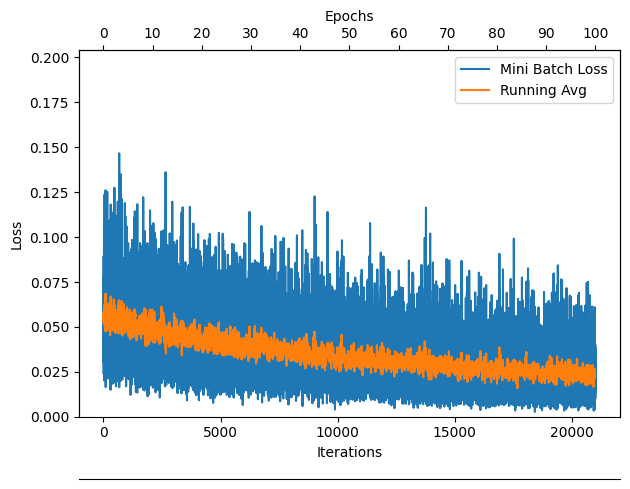

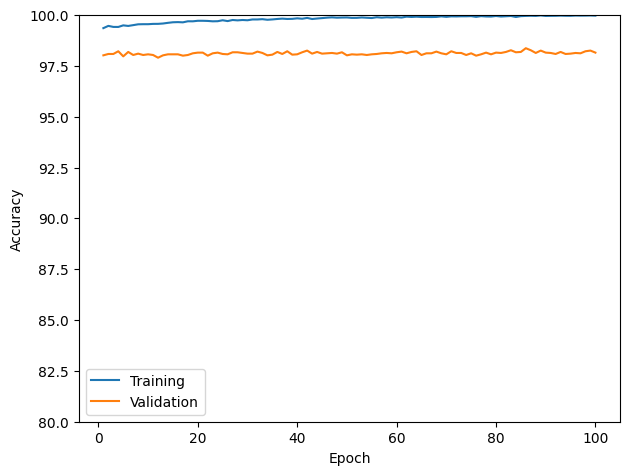

In [40]:
plotTrainingLoss(miniBatchLoss=miniBatchLossList,
                   numEpoch=NUM_EPOCHS+50,
                   iterPerEpoch=len(trainLoader),
                   resultsDir=None,
                   avgIter=20)    #plotTrainingLoss(miniBatchLoss,numEpoch,iterPerEpoch,resultsDir=None,avgIter = 100)
plt.show()
plotAccuracy(trainAccList,validAccList)
plt.ylim([80,100])
plt.show()